# Project Name - Telecom Churn Prediction 

* Project Type - ML Classification
* Contribution - Individual
* Member Name - Sudarshan Mohite

# Project Summary -

The goal of this project was to develop a model for predicting customer churning using machine learning techniques. The model was trained using a supervised learning approach and evaluated using a variety of metrics such as precision, recall, f1-score, roc auc score.     
The project aims to identify patterns and factors contributing to customer churn in the telecom industry and develop predictive models to improve customer retention strategies.       
The results of the project showed that the Random Forest Classifier model was able to accurately predict customer churn.

# Problem Statement -

* The problem statement of this project is to create machine learning model which predicts the customer churn.

# Business Objective?

The primary business objective of this project is to minimize customer churn and implementing targeted retention strategies to reduce churn.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Telecom Churn.csv')     

In [7]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
df.shape

(3333, 20)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [13]:
df.describe(include = 'all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [15]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [109]:
df.Churn.value_counts()/len(df)*100

Churn
False    85.508551
True     14.491449
Name: count, dtype: float64

In [19]:
df.describe().drop(columns = 'Area code').columns

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'],
      dtype='object')

In [21]:
numeric_features = list(df.describe().drop(columns = 'Area code').columns)

In [23]:
len(numeric_features)

15

In [25]:
categorical_features = [    i   for i in list(df.columns)  if i not in numeric_features]

In [27]:
categorical_features

['State', 'Area code', 'International plan', 'Voice mail plan', 'Churn']

In [29]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [31]:
# checking duplicates
df[df.duplicated()]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


In [33]:
df_copy = df.copy()

In [35]:
df_copy.shape

(3333, 20)

# EDA

# univariate analysis

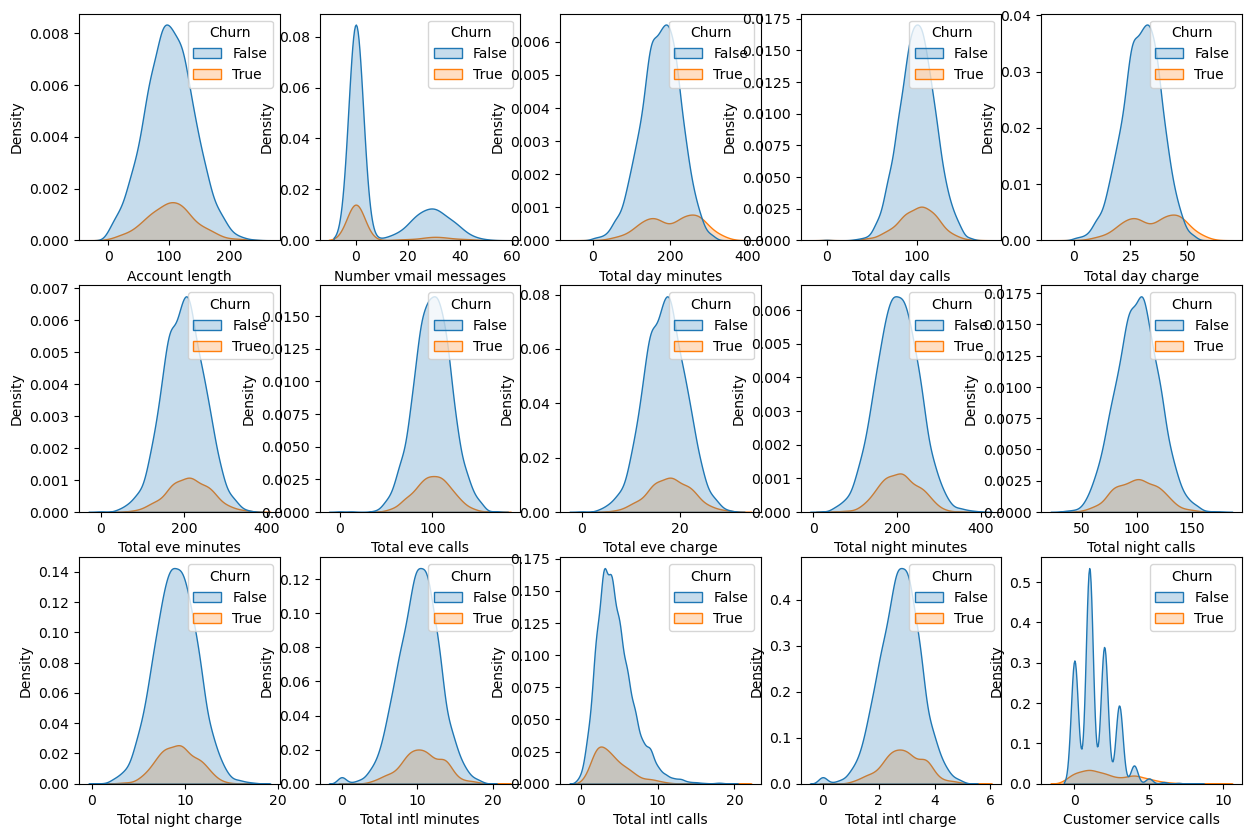

In [37]:
plt.figure(figsize= ( 15,10))

for i in numeric_features :
    plt.subplot( 3,5, numeric_features.index(i) + 1)
    sns.kdeplot( x = i , data = df_copy , hue = 'Churn', fill = True)

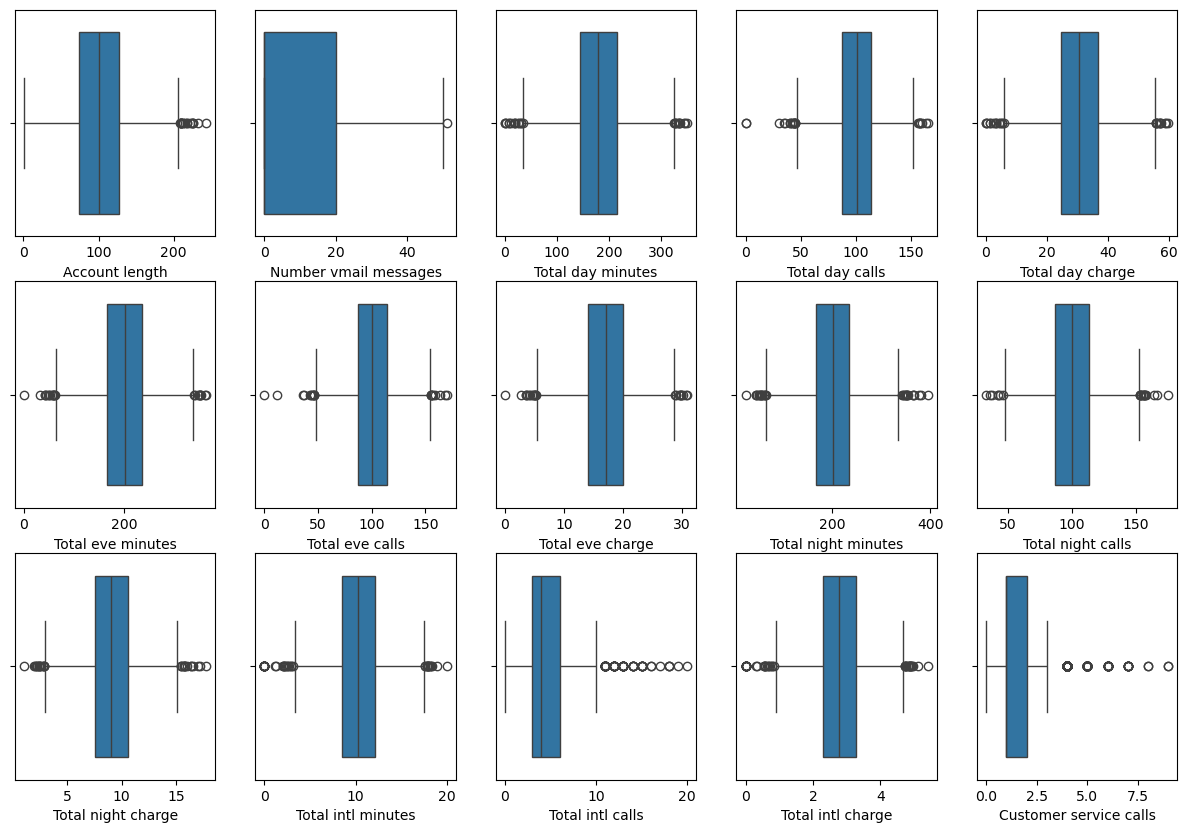

In [39]:
plt.figure(figsize= ( 15,10))

for i in numeric_features :
    plt.subplot( 3,5, numeric_features.index(i) + 1)
    sns.boxplot( x = i , data = df_copy )

In [41]:
df_copy.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [43]:
df_copy.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, 'KS'),
  Text(1, 0, 'OH'),
  Text(2, 0, 'NJ'),
  Text(3, 0, 'OK'),
  Text(4, 0, 'AL'),
  Text(5, 0, 'MA'),
  Text(6, 0, 'MO'),
  Text(7, 0, 'LA'),
  Text(8, 0, 'WV'),
  Text(9, 0, 'IN'),
  Text(10, 0, 'RI'),
  Text(11, 0, 'IA'),
  Text(12, 0, 'MT'),
  Text(13, 0, 'NY'),
  Text(14, 0, 'ID'),
  Text(15, 0, 'VT'),
  Text(16, 0, 'VA'),
  Text(17, 0, 'TX'),
  Text(18, 0, 'FL'),
  Text(19, 0, 'CO'),
  Text(20, 0, 'AZ'),
  Text(21, 0, 'SC'),
  Text(22, 0, 'NE'),
  Text(23, 0, 'WY'),
  Text(24, 0, 'HI'),
  Text(25, 0, 'IL'),
  Text(26, 0, 'NH'),
  Text(27, 0, 'GA'),
  Text(28, 0, 'AK'),
  Text(29, 0, 'MD'),
  Text(30, 0, 'AR'),
  Text(31, 0, 'WI'),
  Text(32, 0, 'OR'),
  Text(33, 0, 'MI'),

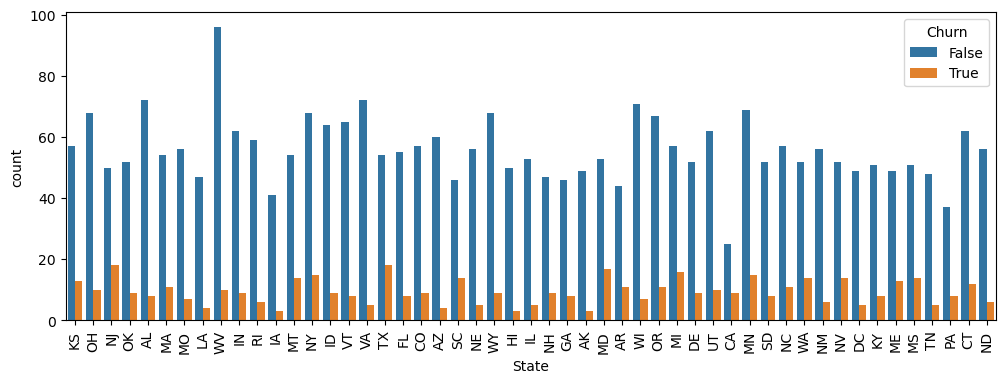

In [45]:
plt.figure(figsize=(12, 4))
sns.countplot( x= 'State', data = df_copy, hue = 'Churn')
plt.xticks( rotation= 90)

In [47]:
df_copy.groupby( ['State', 'Churn'])['State'].count().unstack()

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


In [53]:
categorical_features

['State', 'Area code', 'International plan', 'Voice mail plan', 'Churn']

<Axes: xlabel='Area code', ylabel='count'>

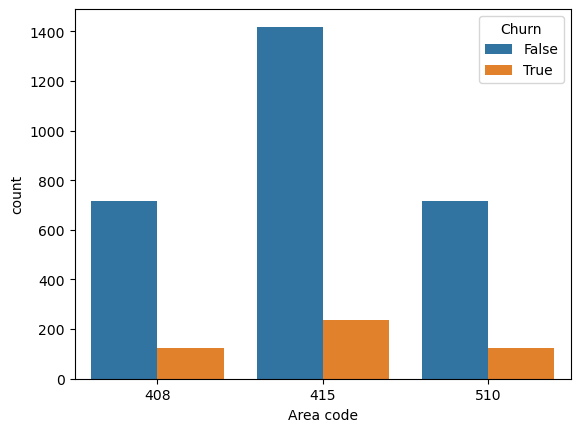

In [55]:
sns.countplot( x = 'Area code' , data = df_copy, hue = 'Churn')

<Axes: xlabel='International plan', ylabel='count'>

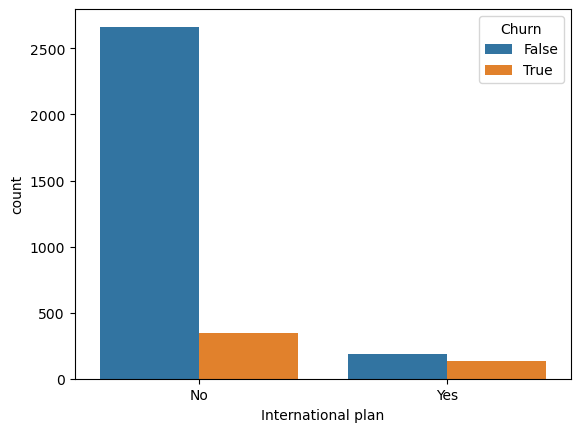

In [57]:
sns.countplot( x = 'International plan' , data = df_copy, hue = 'Churn')

<Axes: xlabel='Voice mail plan', ylabel='count'>

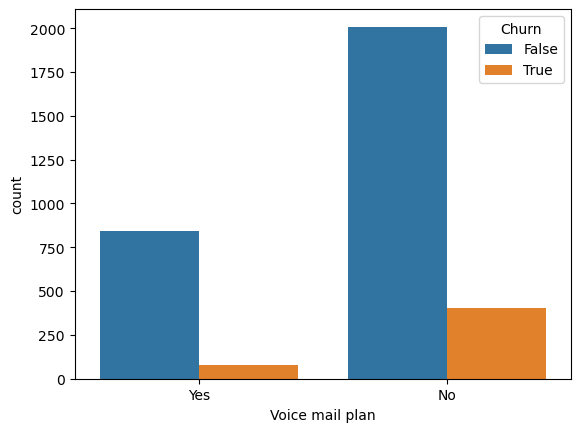

In [59]:
# Voice mail plan

sns.countplot( x = 'Voice mail plan' , data = df_copy, hue = 'Churn')

# bivariate analysis

In [67]:
df_copy['International plan']= df_copy['International plan'].replace( {'Yes' : 1 , 'No': 0}).astype(int)
df_copy['Voice mail plan']= df_copy['Voice mail plan'].replace( {'Yes' : 1 , 'No': 0}).astype(int)

C:\Users\dell\AppData\Local\Temp\ipykernel_12240\51243266.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['International plan']= df_copy['International plan'].replace( {'Yes' : 1 , 'No': 0}).astype(int)
C:\Users\dell\AppData\Local\Temp\ipykernel_12240\51243266.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Voice mail plan']= df_copy['Voice mail plan'].replace( {'Yes' : 1 , 'No': 0}).astype(int)


In [69]:
corr = df_copy.drop(['State', 'Area code'], axis = 1).corr()

In [71]:
corr

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
International plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


<Axes: >

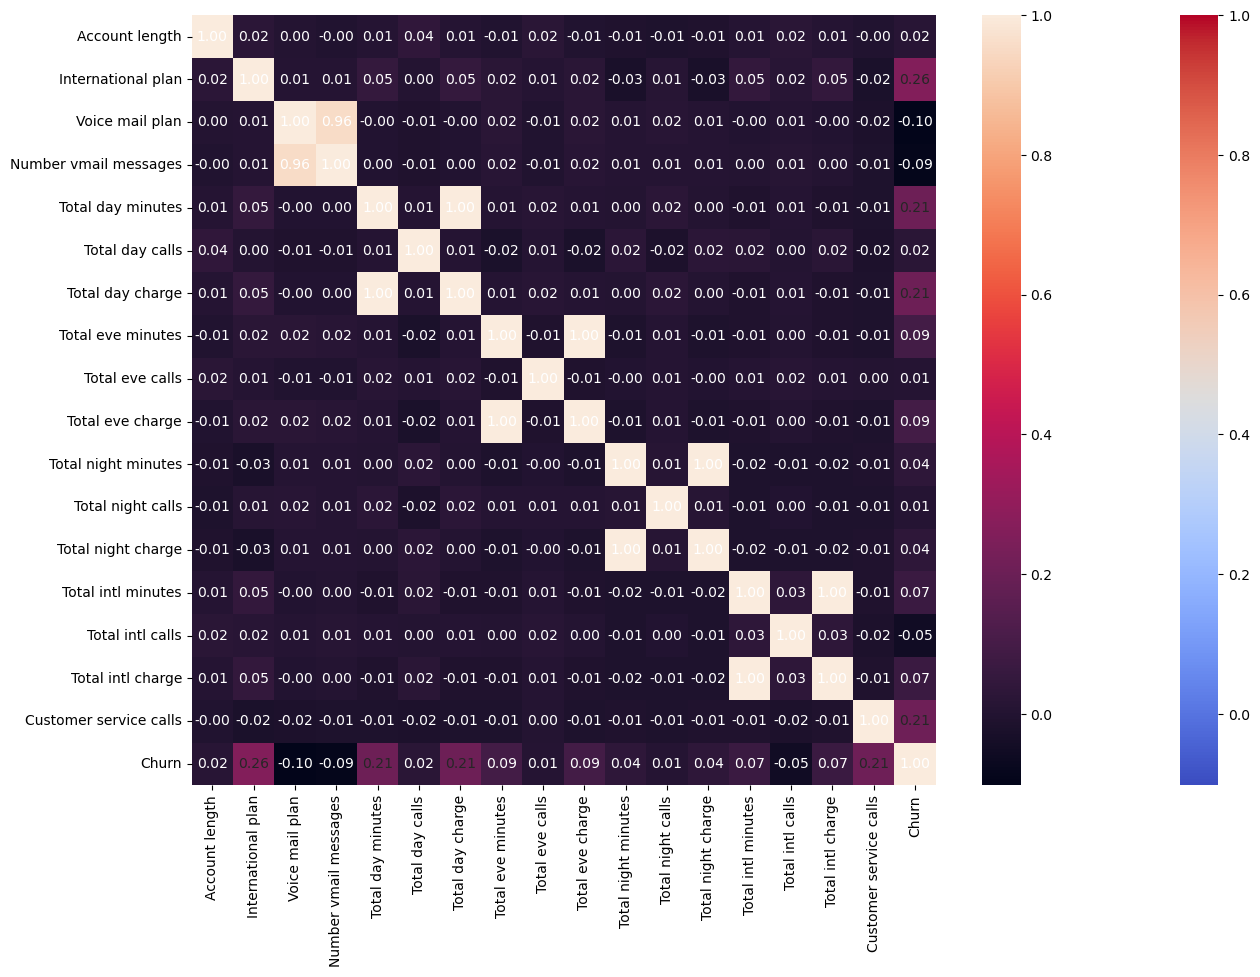

In [113]:
plt.figure(figsize= ( 15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
sns.heatmap( corr)

# Encoding

In [119]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Columns to encode
columns_to_encode = ['State','International plan', 'Voice mail plan', 'Churn']

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids dummy variable trap

# Apply OneHotEncoder and convert to DataFrame
encoded_columns = one_hot_encoder.fit_transform(df[columns_to_encode])
encoded_columns_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(columns_to_encode))

# Combine the encoded columns with the original DataFrame (excluding the original categorical columns)
df_one_hot_encoded = pd.concat([df.drop(columns=columns_to_encode), encoded_columns_df], axis=1)

# Display the resulting DataFrame
print(df_one_hot_encoded.head())


   Account length  Area code  Number vmail messages  Total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   Total eve charge  Total night minutes  ...  State_UT  State_VA  State_VT  \
0             16.78

In [121]:
df_one_hot_encoded.columns


Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
       'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC',
       'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
       'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI',
       'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
       'State_VT', 'State_WA', 'State_

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [99]:
# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
# Initialize models
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1)
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    results[model_name] = {
        "Classification Report": report,
        "AUC-ROC": auc_score
    }

# Extract performance summaries for comparison
performance_summary = {model: {"Accuracy": result["Classification Report"]["accuracy"], 
                               "AUC-ROC": result["AUC-ROC"]}
                       for model, result in results.items()}

performance_summary


{'Logistic Regression': {'Accuracy': 0.8590704647676162,
  'AUC-ROC': 0.8165671911738108},
 'Decision Tree': {'Accuracy': 0.9100449775112444,
  'AUC-ROC': 0.8019352504973773},
 'Random Forest': {'Accuracy': 0.9415292353823088,
  'AUC-ROC': 0.8916892747332248}}

In [103]:
debug_results = {}

for model_name, model in models.items():
    try:
        # Train the model
        model.fit(X_train_scaled, y_train)
        # Predict on the test set
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        # Evaluate the model
        report = classification_report(y_test, y_pred, output_dict=True)
        auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
        debug_results[model_name] = {
            "Classification Report": report,
            "AUC-ROC": auc_score
        }
    except Exception as e:
        debug_results[model_name] = {"Error": str(e)}

debug_results

{'Logistic Regression': {'Classification Report': {'0': {'precision': 0.8814102564102564,
    'recall': 0.9649122807017544,
    'f1-score': 0.9212730318257957,
    'support': 570.0},
   '1': {'precision': 0.5348837209302325,
    'recall': 0.23711340206185566,
    'f1-score': 0.32857142857142857,
    'support': 97.0},
   'accuracy': 0.8590704647676162,
   'macro avg': {'precision': 0.7081469886702445,
    'recall': 0.601012841381805,
    'f1-score': 0.6249222301986121,
    'support': 667.0},
   'weighted avg': {'precision': 0.8310158427047656,
    'recall': 0.8590704647676162,
    'f1-score': 0.8350780460451755,
    'support': 667.0}},
  'AUC-ROC': 0.8165671911738108},
 'Decision Tree': {'Classification Report': {'0': {'precision': 0.9411764705882353,
    'recall': 0.9543859649122807,
    'f1-score': 0.9477351916376306,
    'support': 570.0},
   '1': {'precision': 0.7078651685393258,
    'recall': 0.6494845360824743,
    'f1-score': 0.6774193548387096,
    'support': 97.0},
   'accuracy

In [105]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Fit model
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_
print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best AUC-ROC:", grid_rf.best_score_)


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best AUC-ROC: 0.9225807087649194


In [107]:
# Evaluate the best Random Forest model
y_pred_rf = best_rf.predict(X_test_scaled)
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("Random Forest Test AUC-ROC:", auc_rf)

Random Forest Test AUC-ROC: 0.8919153553988063
